In [115]:
import csv
import datetime
import os
import sys
from itertools import islice
from pprint import pprint

from tabulate import tabulate

DATA_FOLDER = '../../data/recipe/'
DATA_FILES = ['RAW_interactions.csv', 'RAW_recipes.csv']
CHARSET = 'UTF-8'


###############################################################################
def normalise_folder(path: str) -> str:
    """Change le chemin en format UNIX (/) et ajoute le / final si inexistant.

    :param str path: Chemin de dossier à normaliser
    :return str: le chemin remis en forme
    """
    path = path.replace('\\', '/')
    if (path[-1] != '/'):
        path = path + '/'
    # end if
    return path
# end def normalise_folder


def take(n, iterable):
    """Return the first n items of the iterable as a list."""
    return list(islice(iterable, n))
#end def take


###############################################################################
# Powershell 
#   $a = Import-Csv -Path .\data\recipe\RAW_interactions.csv -Delimiter ','
#   $b = Import-Csv -Path .\data\recipe\RAW_recipes.csv -Delimiter ','

# Chargement les datas
data = {}
for filename in DATA_FILES:
    data[filename] = []
    file_path = os.path.join(DATA_FOLDER, filename)
    with open(file_path, 'r', encoding=CHARSET) as file:
        spamreader = csv.reader(file, delimiter=',')
        # spamreader = csv.DictReader(file, delimiter=',')
        for row in spamreader:
            data[filename].append(row)


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x0000010E26200540>
Traceback (most recent call last):
  File "c:\Logiciel\_prog\Python\3.12\Lib\weakref.py", line 370, in remove
    self = selfref()
           ^^^^^^^^^
KeyboardInterrupt: 


## Affichage du nombre de recette et review par an et par mois

In [2]:
# Nombre de recette/review par an/mois
nb_by_year = {}
nb_by_month = {}
for filename in DATA_FILES:
    nb_by_year[filename] = {}
    nb_by_month[filename] = {}

j_date_col = {DATA_FILES[0]: 2, DATA_FILES[1]: 4}
for filename in DATA_FILES:
    print(f'** FICHIER {filename}')
    j = j_date_col[filename]
    for i, row in enumerate(data[filename]):
        if i == 0:  # Pas sur les header
            continue
        col = row[j]
        tmp = col.split('-')
        d = datetime.date(int(tmp[0]), int(tmp[1]), int(tmp[2]))
        if d.year in nb_by_year[filename].keys():
            nb_by_year[filename][d.year] += 1
        else:  # Initialisation
            nb_by_year[filename][d.year] = 1
        month = f'{d.year}-{d.month:02}'
        if month in nb_by_month[filename].keys():
            nb_by_month[filename][month] += 1
        else:  # Initialisation
            nb_by_month[filename][month] = 1
    
    for x in range(1999, 2019):
        if x not in nb_by_year[filename].keys():
            nb_by_year[filename][x] = 0
        for y in range(1, 13):
            mois = f'{y:02}'
            i = f'{x}-{mois}'
            if i not in nb_by_month[filename].keys():
                nb_by_month[filename][i] = 0
    
    nb_by_year[filename] = dict(sorted(nb_by_year[filename].items()))
    nb_by_month[filename] = dict(sorted(nb_by_month[filename].items()))

pprint(nb_by_year)


** FICHIER RAW_interactions.csv
** FICHIER RAW_recipes.csv
{'RAW_interactions.csv': {1999: 0,
                          2000: 108,
                          2001: 2904,
                          2002: 20922,
                          2003: 32961,
                          2004: 45950,
                          2005: 66643,
                          2006: 89794,
                          2007: 141158,
                          2008: 167295,
                          2009: 159445,
                          2010: 107409,
                          2011: 72147,
                          2012: 56410,
                          2013: 49488,
                          2014: 30503,
                          2015: 23374,
                          2016: 18147,
                          2017: 27062,
                          2018: 20647},
 'RAW_recipes.csv': {1999: 2054,
                     2000: 1038,
                     2001: 4682,
                     2002: 20056,
                     2003: 180

In [3]:
filename = DATA_FILES[0]  # 'RAW_interactions.csv'
print(nb_by_month[filename])


{'1999-01': 0, '1999-02': 0, '1999-03': 0, '1999-04': 0, '1999-05': 0, '1999-06': 0, '1999-07': 0, '1999-08': 0, '1999-09': 0, '1999-10': 0, '1999-11': 0, '1999-12': 0, '2000-01': 2, '2000-02': 3, '2000-03': 2, '2000-04': 1, '2000-05': 1, '2000-06': 1, '2000-07': 0, '2000-08': 1, '2000-09': 6, '2000-10': 17, '2000-11': 33, '2000-12': 41, '2001-01': 64, '2001-02': 56, '2001-03': 68, '2001-04': 82, '2001-05': 86, '2001-06': 139, '2001-07': 205, '2001-08': 251, '2001-09': 340, '2001-10': 519, '2001-11': 532, '2001-12': 562, '2002-01': 792, '2002-02': 1043, '2002-03': 1267, '2002-04': 1539, '2002-05': 1616, '2002-06': 1619, '2002-07': 1775, '2002-08': 2031, '2002-09': 2392, '2002-10': 2425, '2002-11': 2256, '2002-12': 2167, '2003-01': 2677, '2003-02': 2369, '2003-03': 2971, '2003-04': 2683, '2003-05': 2321, '2003-06': 2591, '2003-07': 2986, '2003-08': 2679, '2003-09': 2814, '2003-10': 2928, '2003-11': 2916, '2003-12': 3026, '2004-01': 3556, '2004-02': 3251, '2004-03': 3740, '2004-04': 3456

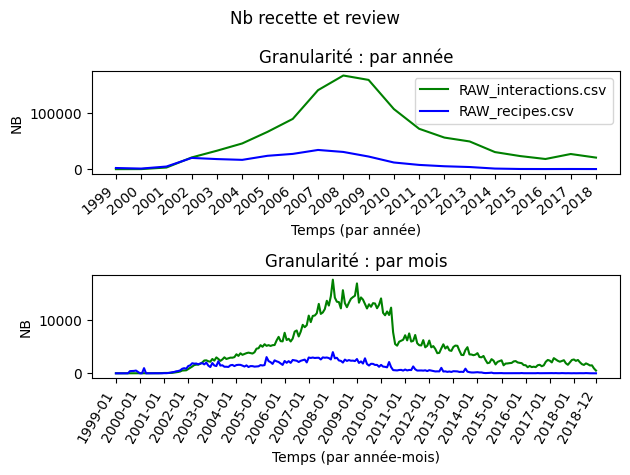

In [109]:
# VERSION 1
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.close('all')
fig = plt.figure()
fig.suptitle('Nb recette et review')
plt_color = {DATA_FILES[0]: 'g', DATA_FILES[1]: 'b'}

# Par an :
ax1 = fig.add_subplot(2, 1, 1)
for filename in DATA_FILES:
    ax1.plot(list(nb_by_year[filename].keys()), list(nb_by_year[filename].values()), '-', color=plt_color[filename], label=f'{filename}')

ax1.legend()
ax1.set_xlabel('Temps (par année)')
ax1.set_ylabel('NB')
ax1.set_title('Granularité : par année')
ax1.set_xticks(list(nb_by_year[filename].keys()))
for label in ax1.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')

# Par mois :
ax2 = fig.add_subplot(2, 1, 2)
for filename in DATA_FILES:
    ax2.plot(list(nb_by_month[filename].keys()), list(nb_by_month[filename].values()), '-', color=plt_color[filename], label=f'{filename}')

ax2.set_xlabel('Temps (par année-mois)')
ax2.set_ylabel('NB')
ax2.set_title('Granularité : par mois')
for label in ax2.get_xticklabels():
    label.set_rotation(60)
    label.set_horizontalalignment('right')
    if label.get_text().split('-')[1] != '01':
        label.set_text('')

id_label = ax2.get_xticks()
text_label = ax2.get_xticklabels()
new_id_label = [x.get_position()[0] for x in text_label if x.get_text().split('-')[1] == '01']
new_id_label.append(id_label[-1])
ax2.xaxis.set_major_locator(ticker.FixedLocator(new_id_label))

"""
# ax2.set_xticklabels(new_labels, rotation=60, horizontalalignment='right')

# new_labels = [x if x.get_text().split('-')[1] == '01' else '' for x in text_label]
# new_labels[-1] = text_label[-1]
# ax2.set_xticklabels(new_labels, rotation=60, horizontalalignment='right')

# original_labels = [str(label) for label in ax2.get_xticks()]
# labels_of_interest = [str(i) for i in range(0,len(original_labels),12)]
# labels_of_interest.append(original_labels[-1])
# print(labels_of_interest)
# new_labels = [label if label in labels_of_interest else "" for label in original_labels]
# # new_labels = [x for x in ]
# # print(new_labels)
# ax2.set_xticklabels(new_labels, rotation=60, horizontalalignment='right')

# ax2.xaxis.set_major_locator(ticker.MaxNLocator(nbins=20))

# original_labels = [str(label) for label in ax2.get_xticks()]
# labels_of_interest = [original_labels[i] for i in range(0,len(original_labels),12)]
# new_labels = [label if label in labels_of_interest else "" for label in original_labels]
# ax2.set_xticklabels(new_labels, rotation=45)
# new_labels = [label if label.get_text().split('-')[1] == '01' else label.set_text('') for label in ax2.get_xticklabels()]
# ax2.set_xticklabels(new_labels, rotation=60, horizontalalignment='right')
"""

fig.tight_layout()
plt.show()


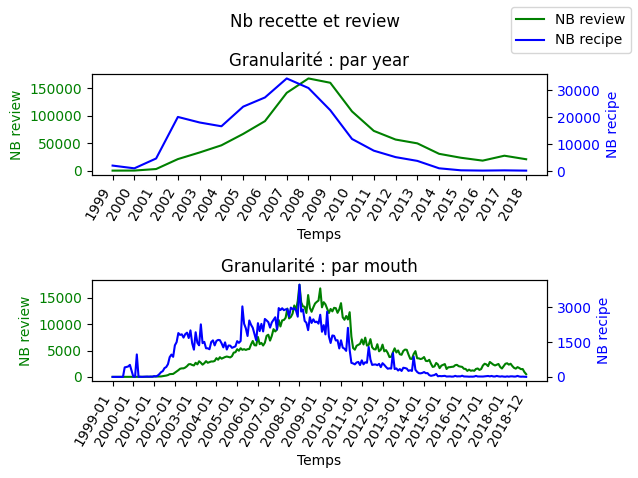

In [127]:
# VERSION 2
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt_color = {DATA_FILES[0]: 'g', DATA_FILES[1]: 'b'}
plt_label = {DATA_FILES[0]: 'NB review', DATA_FILES[1]: 'NB recipe'}
fig_type = ['year', 'mouth']
courbes = {'year':nb_by_year, 'mouth':nb_by_month}

plt.close('all')
fig = plt.figure()
fig.suptitle('Nb recette et review')
for i, graph in enumerate(fig_type):
    ax = fig.add_subplot(2, 1, i + 1)
    ax.set_title(f'Granularité : par {graph}')
    ax.set_xlabel('Temps')

    filename = DATA_FILES[0]
    x = list(courbes[graph][filename].keys())
    y = list(courbes[graph][filename].values())
    color = plt_color[filename]
    ax.set_ylabel(plt_label[filename], color=color)
    line_rev, = ax.plot(x, y, '-', color=color, label=f'{plt_label[filename]}')
    ax.tick_params(axis='y', labelcolor=color)
    
    filename = DATA_FILES[1]
    x = list(courbes[graph][filename].keys())
    y = list(courbes[graph][filename].values())
    color = plt_color[filename]
    ax2 = ax.twinx()  # instantiate a second Axes that shares the same x-axis
    ax2.set_ylabel(plt_label[filename], color=color)
    line_rec, = ax2.plot(x, y, '-', color=color, label=f'{plt_label[filename]}')
    ax2.tick_params(axis='y', labelcolor=color)

    ax.set_xticks(x)
    for label in ax.get_xticklabels():
        label.set_rotation(60)
        label.set_horizontalalignment('right')
    
    if graph == fig_type[1]:
        id_label = ax2.get_xticks()
        text_label = ax2.get_xticklabels()
        new_id_label = [x.get_position()[0] for x in text_label if x.get_text().split('-')[1] == '01']
        new_id_label.append(id_label[-1])
        ax2.xaxis.set_major_locator(ticker.FixedLocator(new_id_label))
    
    ax.yaxis.set_major_locator(ticker.MaxNLocator(4))
    ax2.yaxis.set_major_locator(ticker.MaxNLocator(4))

fig.legend(handles=[line_rev, line_rec])
fig.tight_layout()
plt.show()
